# **1. Reading the data**

In [ ]:
import os
import numpy as np
import pandas as pd
from numpy import sqrt


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas_profiling as pp

from sklearn import cluster, mixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import warnings
warnings.simplefilter('ignore')

pd.set_option('max_columns', 200)

from sklearn.cluster import KMeans
import pickle

In [ ]:
from google.colab import files
uploaded = files.upload() # upload the data

Saving Heart.csv to Heart (1).csv


In [ ]:
# Loading the data
data = pd.read_csv("Heart.csv")



# **2. Cleaning the data**

In [ ]:
#Checking for missing values
data.isnull().sum()

Id           0
Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [ ]:
#Checking for duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [ ]:
data.head(3)


,Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0
1,2,67,1,2,160,286,0,2,108,1,1.5,2,3,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2,2,1


In [ ]:
data = data.drop("Id", 1) # drop the ID column

In [ ]:
data.head(3)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0
1,67,1,2,160,286,0,2,108,1,1.5,2,3,1,1
2,67,1,2,120,229,0,2,129,1,2.6,2,2,2,1


# **3. Visualize the data**




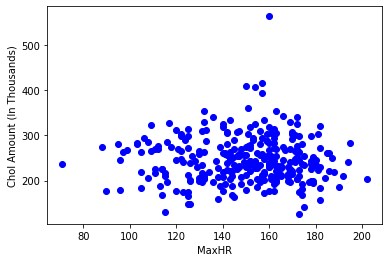

In [ ]:
X = data[["MaxHR", "Chol"]]

plt.scatter(X["MaxHR"], X["Chol"], c="blue") # Visualize data point in scatter plot
plt.xlabel("MaxHR")
plt.ylabel("Chol Amount (In Thousands)")
plt.show()

# **4. Clustering**

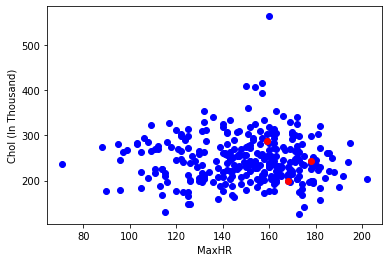

In [ ]:
# step 1 and 2

# number of centriod
K=3

# select random observation as a centriod
Centroids = (X.sample(n=K))
plt.scatter(X["MaxHR"], X["Chol"], c="blue")
plt.scatter(Centroids["MaxHR"], Centroids["Chol"], c="red")
plt.xlabel("MaxHR")
plt.ylabel("Chol (In Thousand)")
plt.show()

In [ ]:
Centroids

,Chol,MaxHR
Cluster,,
1,196.886792,150.367925
2,252.029197,148.693431
3,322.500000,150.350000


In [ ]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["MaxHR"]-row_d["MaxHR"])**2
            d2 = (row_c["Chol"]-row_d["Chol"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1

    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Chol", "MaxHR"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['Chol'] - Centroids['Chol']).sum() + (Centroids_new['MaxHR'] - Centroids['MaxHR']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Chol","MaxHR"]]

0.0


# 5. Visualization for clustering

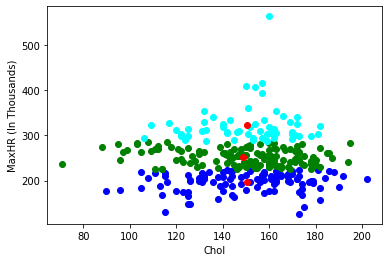

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["MaxHR"],data["Chol"],c=color[k])
plt.scatter(Centroids["MaxHR"],Centroids["Chol"],c='red')
plt.xlabel('Chol')
plt.ylabel('MaxHR (In Thousands)')
plt.show()

In [ ]:
data1 = data
data1.head(3)



,Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0
1,2,67,1,2,160,286,0,2,108,1,1.5,2,3,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2,2,1


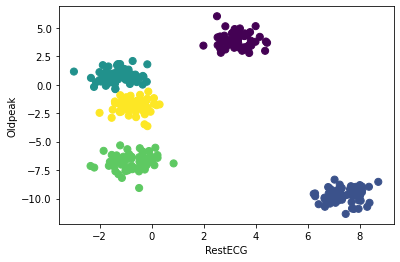

In [ ]:
from typing_extensions import dataclass_transform
from sklearn.datasets import make_blobs
data1, y_true = make_blobs(n_samples=303,n_features= 13, centers=5,cluster_std=0.60, random_state=0)
data1 = data1[:, ::-1] # flip axes for better plotting

# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(5, random_state=0)
labels = kmeans.fit(data1).predict(data1)
plt.scatter(data1[:, 6], data1[:, 9], c=labels, s=50)#cmap='viridis');
plt.xlabel("RestECG")
plt.ylabel("Oldpeak")
plt.show()

# **6. PCA**

In [ ]:
data.head(10)

,Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0
1,2,67,1,2,160,286,0,2,108,1,1.5,2,3,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2,2,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,1,0
4,5,41,0,0,130,204,0,2,172,0,1.4,1,0,1,0
5,6,56,1,0,120,236,0,0,178,0,0.8,1,0,1,0
6,7,62,0,2,140,268,0,2,160,0,3.6,3,2,1,1
7,8,57,0,2,120,354,0,0,163,1,0.6,1,0,1,0
8,9,63,1,2,130,254,0,2,147,0,1.4,2,1,2,1
9,10,53,1,2,140,203,1,2,155,1,3.1,3,0,2,1


In [ ]:
X = data.drop('AHD', 1)
y = data['AHD']

### **6.i. Split the data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### **6.ii. Train and Transform the PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance )


[0.63834427 0.36165573]


In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the test set result using predict function under LogisticRegression
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0]


In [ ]:
# making confusion matrix between test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28  7]
 [10 16]]


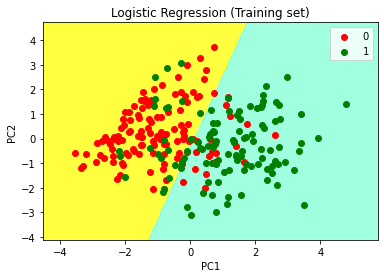

In [ ]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend(loc='best' ) # to show legend

# show scatter plot
plt.show()


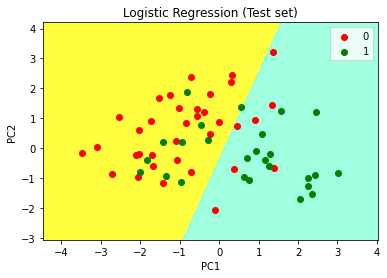

In [ ]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend(loc='best')

# show scatter plot
plt.show()


### **7. t-SNE**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.003s...
[t-SNE] Computed neighbors for 303 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 31.643690
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.001305
[t-SNE] KL divergence after 1000 iterations: 0.524755


[Text(0.5, 1.0, 'Heart data T-SNE projection')]

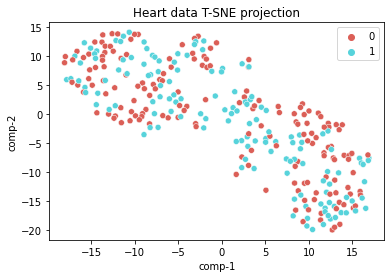

In [ ]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Heart data T-SNE projection")